<a href="https://colab.research.google.com/github/ffelfis/OrgaDatosTPs/blob/main/TP1/nb_facundo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
#import seaborn as sns

In [2]:
# Lectura de Dataset desde Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Análisis de train_values.csv

In [3]:
# Ruta train_values.csv
dir_values = '/content/gdrive/My Drive/75.06 - Organización de Datos/TP1/Data/train_values.csv'

df = pd.read_csv(dir_values)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [5]:
memoria = df.memory_usage(deep=True).sum()/(2**20)
print('Se usan', np.round(memoria, 2), 'MiB')

Se usan 176.95 MiB


No hay columnas con datos nulos.

Se puede reallizar un cambio de tipo a las columnas para ajustar el uso de memoria.

### Columnas numéricas

`building_id`: \[4, 1052934\] $\rightarrow$ int32

`geo_level_1_id`: \[0, 30\] $\rightarrow$ int8

`geo_level_2_id`: \[0, 1427\] $\rightarrow$ int16

`geo_level_3_id`: \[0, 12567\] $\rightarrow$ int16

`count_floors_pre_eq`: \[0, 9\] $\rightarrow$ int8

`age`: \[0, 995\] $\rightarrow$ int16

`area_percentage`: \[0, 100\] $\rightarrow$ int8

`height_percentage`: \[2, 32\] $\rightarrow$ int8

`count_families`: \[0, 9\] $\rightarrow$ int8

In [6]:
df.loc[:, 'building_id':'height_percentage'].describe().astype('int64').loc[['max', 'min'], :]

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage
max,1052934,30,1427,12567,9,995,100,32
min,4,0,0,0,1,0,1,2


In [7]:
df['building_id'] = df['building_id'].astype('int32')
df['geo_level_1_id'] = df['geo_level_1_id'].astype('int8')
df['geo_level_2_id'] = df['geo_level_2_id'].astype('int16')
df['geo_level_3_id'] = df['geo_level_3_id'].astype('int16')
df['count_floors_pre_eq'] = df['count_floors_pre_eq'].astype('int8')
df['age'] = df['age'].astype('int16')
df['area_percentage'] = df['area_percentage'].astype('int8')
df['height_percentage'] = df['height_percentage'].astype('int8')
df['count_families'] = df['count_families'].astype('int8')

In [8]:
memoria = df.memory_usage(deep=True).sum()/(2**20)
print('Se usan', np.round(memoria, 2), 'MiB')

Se usan 162.79 MiB


### Columnas booleanas

`has_superstructure_adobe_mud`, `has_superstructure_mud_mortar_stone`, `has_superstructure_stone_flag`, 
`has_superstructure_cement_mortar_stone`, `has_superstructure_mud_mortar_brick`, `has_superstructure_cement_mortar_brick`, `has_superstructure_timber`, `has_superstructure_bamboo`, `has_superstructure_rc_non_engineered`, `has_superstructure_rc_engineered`, `has_superstructure_other`, `has_secondary_use`, `has_secondary_use_agriculture`, `has_secondary_use_hotel`, `has_secondary_use_rental`, `has_secondary_use_institution`, `has_secondary_use_school`, `has_secondary_use_industry`, `has_secondary_use_health_post`, `has_secondary_use_gov_office`, `has_secondary_use_use_police`, `has_secondary_use_other`

Todas tienen valores \[0, 1\] $\Longrightarrow$ bool

In [9]:
df['has_superstructure_adobe_mud'] = df['has_superstructure_adobe_mud'].astype('bool')
df['has_superstructure_mud_mortar_stone'] = df['has_superstructure_mud_mortar_stone'].astype('bool')
df['has_superstructure_stone_flag'] = df['has_superstructure_stone_flag'].astype('bool')
df['has_superstructure_cement_mortar_stone'] = df['has_superstructure_cement_mortar_stone'].astype('bool')
df['has_superstructure_mud_mortar_brick'] = df['has_superstructure_mud_mortar_brick'].astype('bool')
df['has_superstructure_cement_mortar_brick'] = df['has_superstructure_cement_mortar_brick'].astype('bool')
df['has_superstructure_timber'] = df['has_superstructure_timber'].astype('bool')
df['has_superstructure_bamboo'] = df['has_superstructure_bamboo'].astype('bool')
df['has_superstructure_rc_non_engineered'] = df['has_superstructure_rc_non_engineered'].astype('bool')
df['has_superstructure_rc_engineered'] = df['has_superstructure_rc_engineered'].astype('bool')
df['has_superstructure_other'] = df['has_superstructure_other'].astype('bool')
df['has_secondary_use'] = df['has_secondary_use'].astype('bool')
df['has_secondary_use_agriculture'] = df['has_secondary_use_agriculture'].astype('bool')
df['has_secondary_use_hotel'] = df['has_secondary_use_hotel'].astype('bool')
df['has_secondary_use_rental'] = df['has_secondary_use_rental'].astype('bool')
df['has_secondary_use_institution'] = df['has_secondary_use_institution'].astype('bool')
df['has_secondary_use_school'] = df['has_secondary_use_school'].astype('bool')
df['has_secondary_use_industry'] = df['has_secondary_use_industry'].astype('bool')
df['has_secondary_use_health_post'] = df['has_secondary_use_health_post'].astype('bool')
df['has_secondary_use_gov_office'] = df['has_secondary_use_gov_office'].astype('bool')
df['has_secondary_use_use_police'] = df['has_secondary_use_use_police'].astype('bool')
df['has_secondary_use_other'] = df['has_secondary_use_other'].astype('bool')

In [10]:
memoria = df.memory_usage(deep=True).sum()/(2**20)
print('Se usan', np.round(memoria, 2), 'MiB')

Se usan 124.51 MiB


### Columnas Categóricas

`land_surface_condition`, `foundation_type`, `roof_type`, `ground_floor_type`, `other_floor_type`, `position`, `plan_configuration`, `legal_ownership_status`

In [11]:
df['land_surface_condition'] = df['land_surface_condition'].astype('category')
df['foundation_type'] = df['foundation_type'].astype('category')
df['roof_type'] = df['roof_type'].astype('category')
df['ground_floor_type'] = df['ground_floor_type'].astype('category')
df['other_floor_type'] = df['other_floor_type'].astype('category')
df['position'] = df['position'].astype('category')
df['plan_configuration'] = df['plan_configuration'].astype('category')
df['legal_ownership_status'] = df['legal_ownership_status'].astype('category')

In [12]:
memoria = df.memory_usage(deep=True).sum()/(2**20)
print('Se usan', np.round(memoria, 2), 'MiB')

Se usan 11.19 MiB


In [13]:
df.sample(3, random_state=42)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
111801,1023112,10,1224,11128,1,20,7,3,t,r,n,f,j,s,d,False,True,False,False,False,False,False,False,False,False,False,v,1,False,False,False,False,False,False,False,False,False,False,False
91817,64407,22,1101,12483,2,60,7,6,t,r,n,f,q,s,d,False,True,False,False,False,False,False,False,False,False,False,v,1,False,False,False,False,False,False,False,False,False,False,False
251661,967834,26,39,11440,2,50,6,5,t,r,n,v,q,s,d,False,False,False,False,True,False,False,False,False,False,False,v,1,False,False,False,False,False,False,False,False,False,False,False


# **[NO NECESARIO]** (Mapa)

In [ ]:
# Paquete para manejo de mapas
!pip install geopandas
# Para leer shape files con el paque 'shapefile' (contienen geometría de mapas)
!pip install pyshp

In [ ]:
import geopandas as gpd
import shapefile as shp

## Mapa de Nepal

Se lee el archivo .shp con `shapefile`. Se requieren los archivos que acompañan al .shp.

In [ ]:
sf_Nepal = shp.Reader('/content/gdrive/My Drive/75.06 - Organización de Datos/TP1/map_Nepal/np.shp')

In [ ]:
# Identificación de campos (~ futuro índice de columnas)
sf_Nepal.fields

In [ ]:
# Datos de los campos anteriores
sf_Nepal.records()

In [ ]:
# Puntos de coordenadas para los bordes de los estados.
sf_Nepal.shape(1).points

Se lee el archivo .shp con geopandas.

In [ ]:
map_df = gpd.read_file('/content/gdrive/My Drive/75.06 - Organización de Datos/TP1/map_Nepal/np.shp')

In [ ]:
type(map_df)

In [ ]:
map_df.sample(2, random_state=42)

In [ ]:
map_df.plot(figsize=(5,5), color='green')

plt.show()

# Análisis train_labels.csv

In [14]:
# Ruta train_labels.csv
dir_labels = '/content/gdrive/My Drive/75.06 - Organización de Datos/TP1/Data/train_labels.csv'

df_labels = pd.read_csv(dir_labels)

In [15]:
df_labels.describe().loc[['min', 'max'], 'damage_grade'].to_frame()

,damage_grade
min,1.0
max,3.0


In [16]:
memoria = df_labels.memory_usage(deep=True).sum()/(2**20)
print('Se usan', np.round(memoria, 2), 'MiB')

Se usan 3.98 MiB


In [17]:
df_labels['damage_grade'] = df_labels['damage_grade'].astype('int8')

In [18]:
memoria = df_labels.memory_usage(deep=True).sum()/(2**20)
print('Se usan', np.round(memoria, 2), 'MiB')

Se usan 2.24 MiB


In [19]:
df = df.merge(df_labels, on='building_id', how='inner')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   building_id                             260601 non-null  int32   
 1   geo_level_1_id                          260601 non-null  int8    
 2   geo_level_2_id                          260601 non-null  int16   
 3   geo_level_3_id                          260601 non-null  int16   
 4   count_floors_pre_eq                     260601 non-null  int8    
 5   age                                     260601 non-null  int16   
 6   area_percentage                         260601 non-null  int8    
 7   height_percentage                       260601 non-null  int8    
 8   land_surface_condition                  260601 non-null  category
 9   foundation_type                         260601 non-null  category
 10  roof_type                       

Las filas mantienen el mismo número, 260601, por lo que los `building_id` tenían su correpondiente fila de labels.

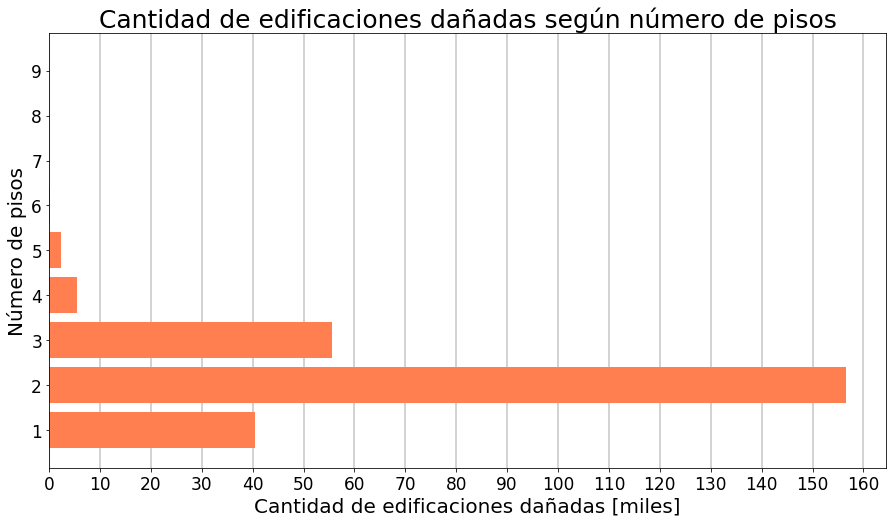

In [24]:
fig,ax = plt.subplots(figsize=(15,8))
pisos = df\
  .groupby('count_floors_pre_eq').agg({'damage_grade':'count'}).reset_index()\
  .rename(columns={'damage_grade':'quantity'})['count_floors_pre_eq']
cantidad = df\
  .groupby('count_floors_pre_eq').agg({'damage_grade':'count'}).reset_index()\
  .rename(columns={'damage_grade':'quantity'})['quantity']

plot = ax.barh(y=pisos, width=cantidad, color='coral')

title='''Cantidad de edificaciones dañadas según número de pisos'''
plt.title(label=title, fontsize=25)
plt.xlabel('Cantidad de edificaciones dañadas [miles]', fontsize=20)
plt.ylabel('Número de pisos', fontsize=20)
plt.xticks(np.arange(0, 160001, step=10000), fontsize=17)
plt.yticks(np.arange(1, 10, step=1), fontsize=17)

# Función para elegir unidades de miles millón
def mil(x, pos):
  return '{:,.0f}'.format(x*1e-3)

plt.gca().xaxis.set_major_formatter(FuncFormatter(mil))
plt.grid(axis='x', linewidth=2, color='lightgray')
ax.set_axisbelow(True)

plt.show()

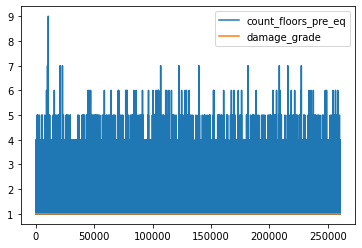

In [ ]:
df.loc[df['damage_grade'] == 1].loc[:, ['count_floors_pre_eq', 'damage_grade']].plot()

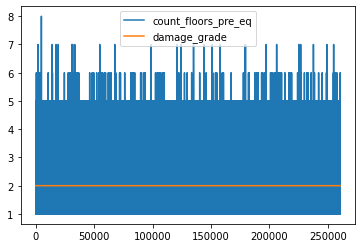

In [ ]:
df.loc[df['damage_grade'] == 2].loc[:, ['count_floors_pre_eq', 'damage_grade']].plot()

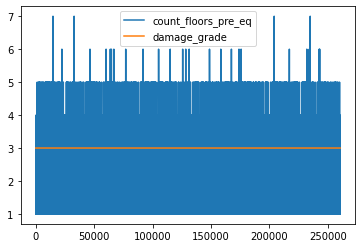

In [ ]:
df.loc[df['damage_grade'] == 3].loc[:, ['count_floors_pre_eq', 'damage_grade']].plot()